<h3> Introduction to Numpy </h3>
In this section we will learn about numpy package that helps in working with arrays.
<h3> References </h3>
Python for Data Analysis, 2nd Edition <br>
<a href="https://docs.scipy.org/doc/numpy-dev/user/quickstart.html"> Numpy Tutorial </a><br>


#### Histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### What is historgram?

In [21]:
sa = np.array( [1, 2, 3, 4, 5] )
data = [ np.random.choice(sa) for _ in range(1000) ]
print (data[0:20])

[1, 2, 2, 3, 1, 5, 3, 4, 3, 1, 4, 3, 5, 5, 2, 3, 4, 4, 4, 1]


In [22]:
# hist[i] number of samples in bins[i]
# number of samples in bin 0 is  defined by binedges[0]<= values of data < bins_edges[1]
binedges = np.array( [1, 2, 3, 4, 5, 6] )
hist, _ = np.histogram(data, bins=binedges)
hist

array([195, 215, 193, 222, 175], dtype=int64)

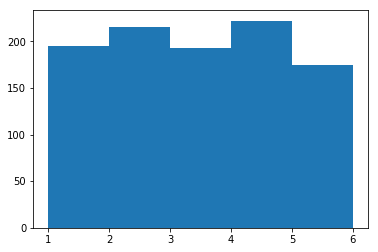

In [23]:
plt.hist(data, bins=binedges)
plt.show()

In [24]:
data.count(1)

195

In [25]:
hist, _ = np.histogram(data, bins=binedges, density=True)

In [26]:
np.sum(hist)

1.0

density : bool, optional

If False, the result will contain the number of samples in each bin. If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.

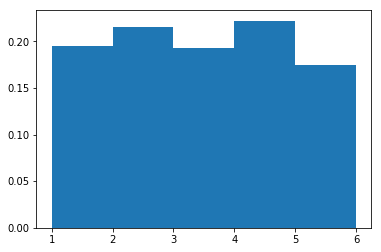

In [27]:
plt.hist(data, density=True, bins=binedges)
plt.show()

In [28]:
np.diff?

In [29]:
w = np.diff(binedges, n=1)
print (w)

[1 1 1 1 1]


In [30]:
isum = w * hist
np.sum(isum)

1.0

Exercise 1: Create 1000 random integer data in the range 0 to 9 with uniform distribution using numpy function np.random.randint(). Create a histogram using pre-specified binedges = [0, 2, 4, 6, 8, 10]. Plot the historgram. 
For density = True option in the numpy funtion historgram() show that the histogram values in the bins are normalzied so that the integral over the range is 1. 

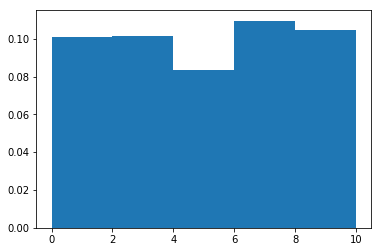

[2 2 2 2 2]


1.0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data=np.random.randint(0,10,1000)
data
binedges = np.array( [0, 2, 4, 6, 8, 10] )
hist, _ = np.histogram(data, bins=binedges, density=True)
plt.hist(data, density=True, bins=binedges)
plt.show()
w = np.diff(binedges, n=1)
print (w)
isum = w * hist
np.sum(isum)

In [33]:
data = np.random.randint(0,10, 1000)
binedges = np.array([0, 2, 4, 6, 8, 10])
hist, _ = np.histogram(data, bins=binedges, density=True)
w = np.diff(binedges, n=1)
print (w)
isum = w * hist
np.sum(isum)

[2 2 2 2 2]


1.0

In [34]:
rng = np.random.RandomState(10)  # deterministic random data
mu, sigma = 2, 0.5
v = rng.normal(mu,sigma,1000)
print (np.mean(v))
print (np.std(v))

1.9927216821922649
0.46897887859806947


In [36]:
hist, bin_edges = np.histogram(v, bins=10, density=False)
print (hist)
print (bin_edges)

[  4   8  52 122 203 260 191 113  28  19]
[0.39779933 0.69201491 0.98623049 1.28044608 1.57466166 1.86887724
 2.16309282 2.45730841 2.75152399 3.04573957 3.33995515]


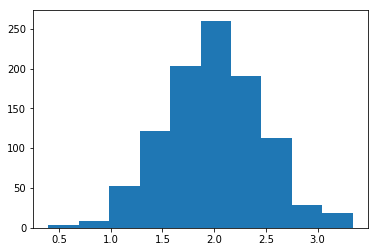

In [37]:
plt.hist(v, bins=bin_edges)
plt.show()

In [38]:
# hist[i] number of samples in bins[i]
# number of samples in bin 0 is  defined by bin_edges[0]<= values of v < bins_edges[1]
print (hist[0], bin_edges[0], bin_edges[1]) 
print (hist.sum())

4 0.3977993278351848 0.6920149104506321
1000


In [39]:
histT, bin_edges = np.histogram(v, bins=10, density=True) 
# here hist[i] is the pdf value at bin i and is normalized such that integral over the range is 1
print (histT)

[0.01359547 0.02719095 0.17674115 0.41466193 0.68997025 0.88370574
 0.64918383 0.38407211 0.09516831 0.0645785 ]


In [40]:
print (histT.sum())
print (np.diff(bin_edges))
np.sum(histT * np.diff(bin_edges))

3.3988682418192786
[0.29421558 0.29421558 0.29421558 0.29421558 0.29421558 0.29421558
 0.29421558 0.29421558 0.29421558 0.29421558]


1.0

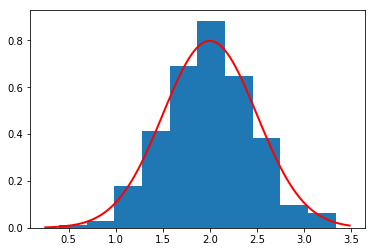

In [43]:
from scipy.stats import norm  # for plotting pdf
plt.hist(v, density=True, bins=bin_edges)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

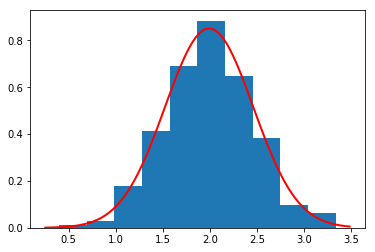

In [44]:
plt.hist(v, density=True, bins=bin_edges)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(v), np.std(v))
plt.plot(x, p, 'r', linewidth=2)
plt.show()

Exercise 2: This exercise is based on a real data of  sale of individual residential property in Ames, Iowa. To complete this exercise, please read the property sale data from a csv file <a href = "resources/train_house.csv"> property sale data</a>  into a 2d numpy array. For this you need to download the csv file and save it on your local folder. You can then use the following command to read the csv file into a 2d array:

house_data = np.genfromtxt('resources/train_house.csv', skip_header=1,delimiter=',')

Also, open the file in excel or notepad to see the header information. For this exercise there are three columns of our interest: 1stFlrSF (first floor sq ft), 2ndFlrSF (second floor sq ft), and  SalePrice.  Extract these columns from 2d numpy array house_data using numpy indexing. You need to compute the price per sqft (sale price/total sq ft) for each house. Compute the historgram and plot the price per sqft data using various number of bins=10,20,30,40, and 50. Based on the computed mean and standard deviation of the data, plot the normal pdf to show the fit along with  each plot (as shown above).  


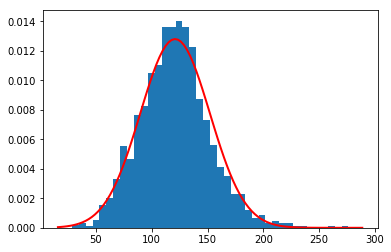

In [56]:
import numpy as np
import pandas as pd
from scipy.stats import norm 
house_data = np.genfromtxt('resources/train_house.csv', skip_header=1,delimiter=',')
np.shape(house_data)
x=house_data[:,43]
y=house_data[:,44]
z=house_data[:,80]
ActPrice = z / (x +y)

# #x=1stFlrSF,y=2ndFlrSF,z=SalePrice.,ppft=pricepersqft.
histT, bin_edges = np.histogram(ActPrice, bins = 40, density=True)
plt.hist(ActPrice, normed = True, bins = bin_edges)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(ActPrice), np.std(ActPrice))
plt.plot(x, p, 'r',linewidth =2)
plt.show()


# Health Data
http://www.healthdata.org/results/data-visualizations 

https://vizhub.healthdata.org/subnational/usa

http://ghdx.healthdata.org/record/united-states-diabetes-prevalence-county-1999-2012

Download the zip file, and open the excel file. Go to the control sheet, and delete first row and the third row. Next save the sheet as CSV file 'US_County_Diabetes_Control_Rate_1999_2012_full.csv'. 

Exercise 3: Open the csv file and read the data into a 2d numpy array. There are two columns of our interest: "Prevalence, 1999, Both Sexes", and "Prevalence, 2012, Both Sexes". Extract the two columns from the 2d numpy array. Plot historgrams for 1999 and 2012 data using 40 bins. Based on the computed mean and standard deviation of the data, plot the normal pdf to show the fit along with  each historgram plot. Comment on the differences between the two historgrams and the corresponding fits with the normal distribution.  

In [ ]:
#Hint 
Use the following command to 
ctrl_rate_data = np.genfromtxt('resources/US_County_Diabetes_Control_Rate_1999_2012_full.csv', skip_header=1, delimiter=',')
# View the shape of the 2d array
np.shape(ctrl_rate_data)
# View the file in excel to identify the column number 
# Extract the two columns using numpy indexing. For example, to extract column#5
data5 = ctrl_rate_data[:,5]
# Make sure you have extracted the right column by displaying some values and comparing it what you observe in
# excel file, for example
data5[0:10]
# Next plot histograms as indicated in the exercise.

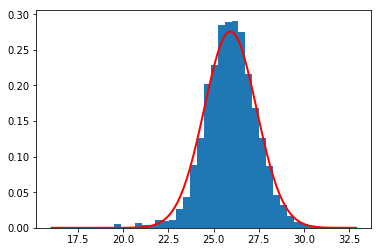

In [74]:
ctrl_rate_data = np.genfromtxt('resources/US_County_Diabetes_Control_Rate_1999_2012_full.csv', skip_header=1, delimiter=',')
np.shape(ctrl_rate_data)
ctrl_rate_data[0:10]
Prevalence2012=ctrl_rate_data[:,43]
Prevalence1999=ctrl_rate_data[:,2]
mu=np.mean(Prevalence1999)
sigma=np.std(Prevalence1999)
plt.hist(Prevalence1999, density=True, bins=40)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu,sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.show()


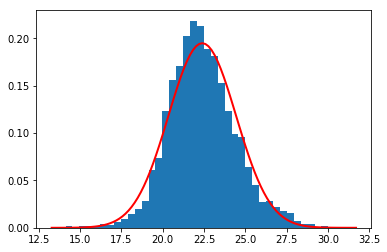

In [76]:
Prevalence2012=ctrl_rate_data[:,43]
mean=np.mean(Prevalence2012)
std=np.std(Prevalence2012)
plt.hist(Prevalence2012, density=True, bins=40)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean,std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()


### Working with Sparse Matrices
http://www.scipy-lectures.org/advanced/scipy_sparse/storage_schemes.html

A matrix that has number of entries as zeroes is referred to as sparse and there are several storage schemes that take advantage of the sparsenenss and only store non-zeroes entries. 

Example sparse matrix: Netflix Rank Matrix of size 500K Users X  20K Movies (A row in this matrix is sparsely populated)

For computational efficiency it becomes necessary to work with sparse storage structure of large sparse matrices. 

### Example Sparse Matrix Storage Formats

####  Coordinate Format (COO)
-  also known as the ‘ijv’ or ‘triplet’ format
-  three NumPy arrays: row, col, data
-  data[i] is value at (row[i], col[i]) position


In [2]:
import numpy as np
import scipy.sparse as sps

In [3]:
#create using (data, ij) tuple:
row = np.array([0, 3, 1, 0])
col = np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])
mtx = sps.coo_matrix((data, (row, col)), shape=(4, 4))
mtx     
mtx.todense()


matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

In [4]:
#duplicates entries are summed together:
row = np.array([0, 0, 1, 3, 1, 0, 0])
col = np.array([0, 2, 1, 3, 1, 0, 0])
data = np.array([1, 1, 1, 1, 1, 1, 1])
mtx = sps.coo_matrix((data, (row, col)), shape=(4, 4))
mtx.todense()


matrix([[3, 0, 1, 0],
        [0, 2, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]])

#### Compressed Sparse Row Format (CSR)
- three NumPy arrays: indices, indptr, data
- indices is array of column indices
- data is array of corresponding nonzero values
- indptr points to row starts in indices and data


In [5]:
data = np.array([1, 2, 3, 4, 5, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
mtx = sps.csr_matrix((data, indices, indptr), shape=(3, 3))
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

In [6]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand
import matplotlib.pylab as plt

In [7]:
A = lil_matrix((1000, 1000))
A[0, :100] = rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(rand(1000))


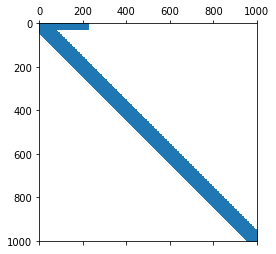

In [8]:
# Now convert it to CSR format
B = A.tocsr()    
plt.spy(B)
plt.show()

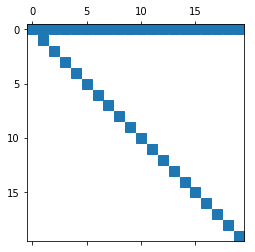

In [9]:
BS = B[0:20, 0:20]    
plt.spy(BS)
plt.show()

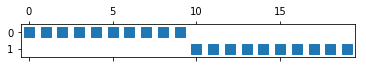

In [10]:
BS = B[0:2, 90:110]    
plt.spy(BS)
plt.show()

In [ ]:
# Create RHS and solve A x = b for x:
b = rand(1000)
# for performance reason convert to CSR format
csrA = A.tocsr()
x = spsolve(csrA, b)

In [ ]:
# Convert it to a dense matrix and solve, and check that the result is the same:
x_ = solve(A.toarray(), b)

In [ ]:
err = norm(x-x_)
err < 1e-10


Exercise 4: Create a sparse movie rank matrix for 200 users and 200 movies. For each user assign a random score of 1 to 5 for 3 to 5 randomly selected movies. Use spy() to visualize the randomly created matrix.


In [ ]:
np.full?

In [ ]:
#HINT: First create the sparsity structure of the movie rank matrix.
# Next assign a score for each non-zero. 
# The code fragment below show how to generate sparsity structure in coo format for a row (user) of the movie rank matrix.
# For this we will use numpy functions: 
# np.random.choice(), np.random.randint(), np.full(). 
# for example to generate number of randomly selected movies for a user (row)
number_of_movies_for_user = np.random.randint(3,6)
print(number_of_movies_for_user)
# Randomly select movies seen by a user by generating the indices in the range 0 to total_num_movies-1 using
# Random_choice function. total_num_movies = 200
total_num_movies = 200
movies_seen_by_user = np.random.choice(total_num_movies, number_of_movies_for_user, replace=False)
print (movies_seen_by_user)
# We now have column indices (movies_seen_by_user) for a row of movie rank matrix. For coo format we also need row indices.
# The row inidices for a user is determined by the row number. For example, for user corresponding to row#5, we can
# generate row indices by
row_indices = np.full(number_of_movies_for_user, 5)
print (row_indices)
# You need to repeate this for every user to construct the sparsity structure of the full  matrix. Next you have to assign
# random score in the data array. The size of the data array is total number of column inidices for all users.

781
[2 1 0 1 1 4 1 2 4 0 5 0 2 4 4 5 4 3 2 1 3 2 3 0 3 4 5 4 5 5 5 5 5 4 1 1 2
 4 4 5 0 4 4 4 4 1 5 5 2 4 1 4 4 2 1 1 3 3 3 3 3 0 4 1 0 1 5 4 1 4 2 2 4 2
 2 5 0 2 1 2 4 3 2 0 4 2 1 2 5 2 3 1 3 0 0 0 0 3 4 5 3 5 3 5 5 1 3 2 1 4 1
 1 4 0 3 0 1 3 0 0 5 5 1 0 4 1 2 0 0 1 4 3 3 2 3 0 5 3 3 1 5 2 5 3 4 1 0 2
 1 0 4 1 2 0 5 0 2 0 3 4 1 4 2 1 3 0 2 0 3 4 2 1 2 4 0 2 4 0 5 1 5 0 5 4 3
 2 1 5 5 0 1 0 0 4 4 2 3 0 5 3 2 0 2 0 3 3 1 5 5 5 3 3 2 2 0 1 0 2 0 3 5 1
 5 4 4 1 5 1 2 0 4 5 1 5 5 5 1 1 3 2 2 5 4 1 2 1 5 4 4 4 0 5 2 1 4 3 2 5 1
 5 4 1 5 5 2 0 0 3 3 0 4 5 0 0 1 5 5 2 0 5 2 0 2 3 4 1 2 3 1 0 5 2 0 3 2 1
 5 2 0 5 1 1 1 1 5 5 3 0 0 5 2 0 0 4 2 4 2 2 1 0 1 5 3 5 4 0 4 2 0 2 4 4 5
 3 3 4 2 3 4 0 0 5 1 1 2 3 3 0 3 5 3 3 0 5 5 0 2 5 3 5 1 4 5 3 4 0 5 2 5 4
 1 3 1 2 1 3 1 0 0 5 2 1 3 0 0 0 5 1 3 2 1 2 1 5 5 2 3 3 3 1 5 0 0 3 4 2 3
 5 3 3 5 3 4 4 4 2 1 2 5 4 3 1 0 3 3 0 5 4 5 0 1 5 1 3 1 0 4 0 3 2 0 5 1 5
 2 5 0 5 5 3 2 5 0 4 2 5 2 3 3 1 0 5 4 1 0 3 3 2 1 2 3 5 2 0 0 1 1 4 0 4 2
 0 0 5 3 1 0 3 5 2 1 

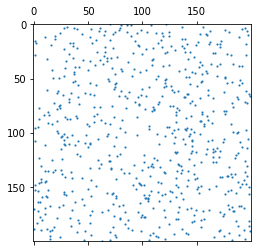

In [23]:
import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sps
movies=200
users=200
col = np.empty(0, int)
row = np.empty(0, int)
for row_ind in range (users):
    selectedmovies=np.random.randint(3,6)
    tcol=np.random.choice(movies,selectedmovies, replace=False)#to fill the number of movies watched by a user in the column.
    col=np.append(col,tcol)
    trow=np.full(selectedmovies,row_ind)
    row=np.append(row,trow)
nonzeroes=len(col)
print(nonzeroes)
score=np.random.randint(6,size=nonzeroes)
print(score)
A = sps.coo_matrix((score,(row,col)),shape=(users,movies))#constructing matrix using the package.

plt.spy(A, markersize = 1)
plt.draw()
plt.show()
